<a href="https://colab.research.google.com/github/raqueeb/Intermediate-scikit-learn/blob/master/book_plot_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

## 'কনফিউশন ম্যাট্রিক্স' নিয়ে কনফিউশন নয় আর

মনে আছে ক্লাসিফিকেশনস সমস্যার জন্য আমরা ব্যবহার করেছিলাম অ্যাকুরেসির একটা পরিমাপ? আমাদের সুপারভাইজার মডেল কেমন পারফর্ম করছে তার একটা সামারি বোঝা যায় এই অ্যাকুরেসি থেকে। ক্লাসিফিকেশন সমস্যার সবচেয়ে সহজ ব্যাপারটা আমরা দেখেছি বাইনারি ক্লাসিফিকেশন এ। মেশিন লার্নিং সমস্যায় এটা বেশ কমন এবং কনসেপচুয়ালি আমাদের কাজে লাগে। বাইনারি ক্লাসিফিকেশন মানে হচ্ছে সেটার আউটকাম হবে পজেটিভ অথবা নেগেটিভ। হ্যাঁ অথবা না। আমাদের মডেল কেমন ফাংশন করছে সেটা নির্ভর করবে এই পজিটিভ এবং নেগেটিভ ক্লাস কতটা ভুল করছে তার ম্যাট্রিক্স এ। তবে এখানে একটা কথা আছে - পজেটিভ মানে সেটা যে ভালো বা সেটা আমাদেরকে বেশি বেনিফিট বা ভ্যালু দেয় সেরকম না কিন্তু। এটা নির্ভর করবে আমরা কি ধরনের স্টাডি করছি এবং তার অবজেক্টিভ কি? আবার নেগেটিভ মানে যে খারাপ সে রকম নাও হতে পারে, এটা নির্ভর করছে আমরা কি ধরনের আউটকাম আশা করছি।

একটা গল্প দিলে বোঝা যাবে বেশি। আমার পাঠকেরা আমাকে বেশি গল্প দিতে বলেন।

ধরা যাক আমরা একটা অ্যাপ্লিকেশন ডেভলপ করছি যার কাজ হচ্ছে একজন সম্ভাব্য রোগীকে স্ক্রিনিং করে আলাদা করে ফেলবে তার সেই রোগটা আছে অথবা নেই। এটাকে কিছুটা অটোমেটেড আর্লি ডিটেকশন বলতে পারি যাতে সেই সম্ভাব্য রোগী পুরোপুরি অসুস্থ হবার আগেই তাকে ঠিকমতো ট্রিটমেন্ট দেয়া যায়। শুরুতেই যদি টেস্টটা নেগেটিভ হয় তাহলে আমরা ধরে নেব সম্ভাব্য রোগী সুস্থ আছেন। এর পাশাপাশি যদি এই স্ক্রিনিং টেস্ট পজিটিভ হয় তাহলে সেই রোগীকে আরও বাড়তি টেস্ট এর মধ্যে দিয়ে যেতে হবে। 

কিভাবে এটা সমস্যা হলো?

এখানে আমরা পজিটিভ ক্লাসকে আসলে নেগেটিভ ধারণা বলতে পারি, কারণ একজন রোগী যখন পজিটিভ হবেন - সেটা আসলে রোগীর কাছে একটা নেগেটিভ জিনিস। আসল কথা কেউ এখানে পজিটিভ হতে চাইবেন না। বরং এই স্ক্রিনিং টেস্ট এর আউটকাম যদি নেগেটিভ হয় সেটাই রোগীর জন্য পজিটিভ। অর্থাৎ আমরা চাইব টেস্টে যত নেগেটিভ হয় ততই ভালো। তাই বলে যে আমাদের মডেল সব সময় ঠিকমতো পজেটিভ বা নেগেটিভ আউটকাম দিতে পারবে সেটাও না। যখন আমাদের অ্যাপ্লিকেশন সত্যিকারের পজিটিভকে নেগেটিভ অথবা সত্যিকারের নেগেটিভকে পজেটিভ বলবে তখনই সমস্যা হয়ে যাবে দুদিকেই। এই ভুল দুদিকে হলেও দুদিকেই দু'ধরনের কনসিকোয়েন্স আছে। হয়তোবা একটা ভুল থেকে আরেকটা ভুলের মাশুল দিতে হবে অনেক বেশি, তবুও আমরা চাইব না কোনভাবেই এই দুই ধরনের ভুল হোক।

কি কি ভুল হতে পারে? 

প্রথম ভুল হবে যখন একজন সুস্থ মানুষকে সেই অ্যাপ্লিকেশনটা পজিটিভ হিসেবে দেখাবে, তখন সেই মানুষটাকে রোগী বলবো এবং তাকে পরবর্তী কয়েকটা টেস্ট এর মধ্যে দিয়ে যেতে হবে। এতে সমস্যা দুটো। প্রথমত, সেই মানুষটি মানসিকভাবে বিপর্যস্ত হয়ে পড়বে, দ্বিতীয়তঃ তার খরচ বাড়তে থাকবে নতুন টেস্টগুলোর জন্য। এই ভুল পজিটিভ প্রেডিকশন কে আমরা বলি ‘ফলস পজিটিভ’। এটাকে পরিসংখ্যানের ভাষায় আমরা বলি টাইপ ১ এরর। 

তবে, দ্বিতীয় ভুলটি ভয়াবহ। একজন সত্যিকারের রোগীকে এই অ্যাপ্লিকেশন নেগেটিভ হিসেবে ক্লাসিফাই করবে, এর মানে হচ্ছে তাকে আর পরবর্তী নতুন কোন টেস্ট এবং তার অ্যাসোসিয়েটেড ট্রিটমেন্ট বাদ পড়ে যেতে পারে। এর ফলাফল সেই সত্যিকারের রোগীকে ভয়াবহ দিকে ঠেলে দিতে পারে। এ ধরনের ভুল যাকে আমরা বলছি ভুল নেগেটিভ প্রেডিকশন, তাকে আমরা মেশিন লার্নিং এ ভাষায় বলি ‘ফলস নেগেটিভ’। পরিসংখ্যানের ভাষায় আমরা এই ‘ফলস নেগেটিভ’কে বলি টাইপ ২ এরর।

এখানে কি চাইবো?

আমরা চাইবো যেকোনোভাবে যাতে আমাদের অ্যাপ্লিকেশন যত কম ‘ফলস নেগেটিভ’ দিতে পারে। ‘ফলস নেগেটিভ’ একটা ভয়াবহ জিনিস বিশেষ করে রোগের ক্ষেত্রে। সেই থেকে ‘ফলস পজিটিভ’ হলে আমরা সেই সুস্থ মানুষের কাছে ক্ষমা চেয়ে নেব। তবে আমরা চেষ্টা করব যাতে দুটো ভুলই কমে আসে আমাদের এপ্লিকেশনে।

আমাদের কি করনীয়?

বাইনারি ক্লাসিফিকেশনকে ঠিকমতো ইভালুয়েট করতে হলে একটা ভালো কম্প্রিহেনসিভ গাইডলাইন হচ্ছে ‘কনফিউশন মাট্রিক্স’ ব্যবহার করা। যখন আমাদের ক্লাসিফিয়ের তার প্রেডিকশন এ কনফিউজড হয়ে ভুল করবে, তখন আমাদের জানা দরকার সে আসলে কোন ভুল করতে অন্য কি ভুল করে ফেলল? বাইনারি ক্লাসিফিকেশন না হলে যদি অন্যান্য ক্লাসিফিকেশন নিয়ে কাজ কাজ করতাম, তাহলে কি হতো? ধরা যাক আমরা ডিজিট রিকগনিশন মানে সংখ্যকে ঠিকমতো ক্লাসিফাই করতে পারছে কিনা সেটা দেখতে চাইছি। তখন আমরা দেখতে চাইবো সংখ্যা ১ আসলে মিসক্লাসিফাই হয়ে অন্য কোন সংখ্যায় রূপান্তর হচ্ছে, অথবা সংখ্যা ৬ কতবার ভুল করে সংখ্যা ৮ এর মত করে ক্লাসিফাই হচ্ছে। বেশি বলে ফেললাম?

আচ্ছা ঠিক আছে, আমরা আপাতত বাইনারি ক্লাসিফিকেশন নিয়েই থাকি। যেহেতু বাইনারি ক্লাসিফিকেশন এর আউটকাম মাত্র দুটো, এর মানে হচ্ছে আমাদের কনফিউশন ম্যাট্রিক্সের দুটো সারি এবং দুটো কলাম থাকবে। আমরা এভাবে বলতে পারি এটা একটা ২ বাই ৩ অ্যারে, যেখানে সারিগুলো রিপ্রেজেন্ট করছে সত্যিকারের আসল ক্লাসকে। ছবি দেখুন, মোট চারটা সেল। আমাদের কলামগুলো রিপ্রেজেন্ট করছে প্রেডিকটেড ক্লাসকে। এখানে প্রথম কলামে কতগুলো পজিটিভ স্যাম্পলকে পজেটিভ অথবা নেগেটিভ হিসেবে প্রেডিক্ট করেছে। এরপরের কলামে আমরা দেখব কতগুলো নেগেটিভ স্যাম্পলকে ভুল করে পজেটিভ অথবা নেগেটিভ হিসেবে প্রেডিক্ট করেছে।

আমরা হাতেকলমের মানুষ, দেখি হাতেকলমে।


In [0]:
# ০ হচ্ছে নেগেটিভ, ১ হচ্ছে পজিটিভ
# ০ মানে রোগ নেই, ১ মানে রোগ আছে
# ৪ জন রোগীর স্যাম্পল
y_true = [1, 1, 0, 1]
y_pred = [1, 1, 0, 1]

In [19]:
from sklearn.metrics import confusion_matrix

labels=[0,1] # ০ মানে রোগ নেই, ১ মানে রোগ আছে

# confusion_matrix(y_true, y_pred, labels=[0,1]) একই জিনিস
# confusion_matrix(y_true, y_pred, labels)
confusion_matrix(y_true, y_pred)

array([[1, 0],
       [0, 3]])

In [20]:
y_true = [1, 1, 0, 1]
y_pred = [1, 0, 1, 1]

confusion_matrix(y_true, y_pred)

array([[0, 1],
       [1, 2]])

![alt text](https://github.com/raqueeb/Intermediate-scikit-learn/raw/master/assets/cm-1.png)

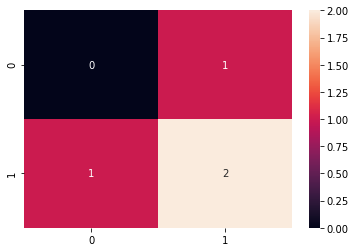

In [21]:
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True)


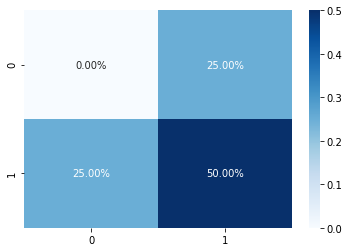

In [22]:
import numpy as np

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred) 

0.5

এখানে ম্যাচ কয়টা?

ম্যাচের সংখ্যা = ২
স্যাম্পলের সংখ্যা = ৪

অ্যাক্যুরেসি = ম্যাচ/স্যাম্পল
অ্যাক্যুরেসি = ২/৪
অ্যাক্যুরেসি = ০.৫০

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



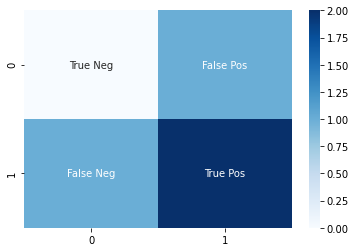

In [25]:
# কোড দেখার প্রয়োজন নেই, শুধুমাত্র বোঝার জন্য, ধারণা বুঝলে পরে কোড বুঝবো

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

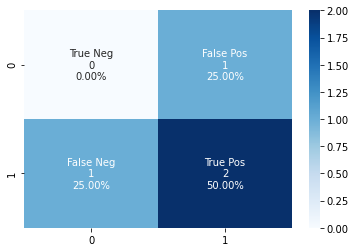

In [26]:
# কোড দেখার প্রয়োজন নেই, শুধুমাত্র বোঝার জন্য, ধারণা বুঝলে পরে কোড বুঝবো

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

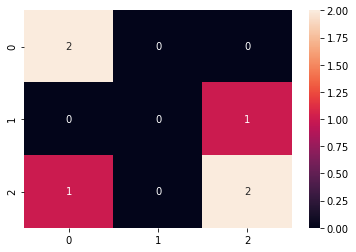

In [27]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

In [28]:
import pandas as pd

y_Actual =    pd.Series([0, 0, 1, 0, 0, 1, 1, 1, 1, 1], name='Actual')
y_Predicted = pd.Series([1, 0, 1, 0, 0, 0, 0, 1, 0, 0], name='Predicted')

df_confusion = pd.crosstab(y_Actual, y_Actual)

df_confusion

Actual,0,1
Actual,,
0,4,0
1,0,6


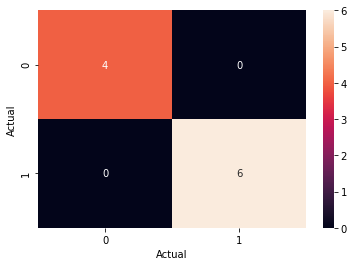

In [29]:
import seaborn as sns

sns.heatmap(df_confusion, annot=True)

In [30]:
df_confusion = pd.crosstab(y_Actual, y_Predicted, rownames=['Actual'], colnames=['Predicted'], margins=True)

df_confusion

Predicted,0,1,All
Actual,,,
0,3,1,4
1,4,2,6
All,7,3,10


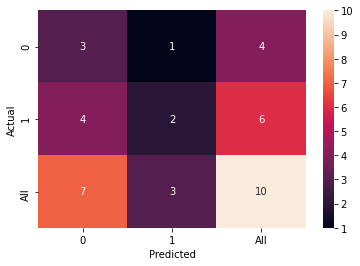

In [31]:
import seaborn as sns

sns.heatmap(df_confusion, annot=True)

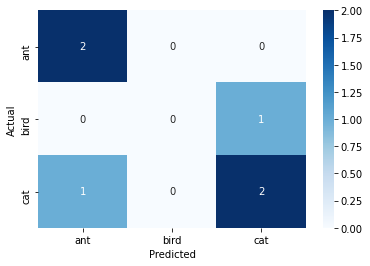

In [32]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

cm = confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

df_cm = pd.DataFrame(cm, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True)

In [0]:
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [34]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [0]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
X_test.shape

(38, 4)

In [0]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

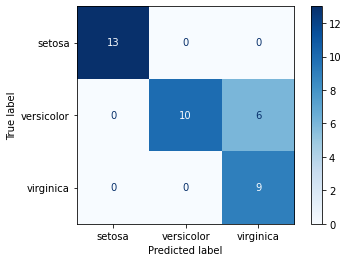

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test,
                                  cmap=plt.cm.Blues,
                                  display_labels=class_names)

In [39]:
(13 + 10 + 9) + 6

38

In [40]:
classifier.score(X_test, y_test)

0.8421052631578947

In [41]:
32 / 38

0.8421052631578947